In [1]:
import datetime
now = datetime.datetime.now()
from pymongo import MongoClient
from bson.objectid import ObjectId
con = MongoClient("localhost", 27017)
db=con.wellbeing11
well = db.well
post_1 = {
    'name': 'Nishesh',
    'content': 'well-being',
    'review': "i think i have positive self-esteem and living my life fully"
}
post_2 = {
     'name': 'mrinalni',
    'content': 'well-being',
    'review':  "learners life long learners whether formal informal education maintain sense purpose competency thereby improving positive self image education also provides social interaction opportunities"
}
post_3 = {
     'name': 'triman',
    'content': 'well-being',
    'review': "self defeating talk messages send reduce confidence diminish performance lower potential ultimately sabotage success common self defeating talk includes sentence beginnings"
}
new_result = well.insert_many([post_1, post_2, post_3])
print('Multiple posts: {0}'.format(new_result.inserted_ids))

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def cleanStr(string):
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()


Multiple posts: [ObjectId('5c0dfd56f43ca003b7d82602'), ObjectId('5c0dfd56f43ca003b7d82603'), ObjectId('5c0dfd56f43ca003b7d82604')]


In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def removeStopwords(sentence):
    word_tokens = word_tokenize(sentence)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    
    return " ".join(str(e) for e in filtered_sentence)


In [3]:
fgd = open("positive wellbeing.txt")
fgd1 = fgd.readlines()
gdArr = []
for i in fgd1:
    gdArr.append(removeStopwords(cleanStr(i)))

fgd = open("negative wellbeing.txt")
fgd1 = fgd.readlines()
adArr = []
for i in fgd1:
    adArr.append(removeStopwords(cleanStr(i)))

descArr = gdArr+adArr
print(gdArr)
print ("BREAK")
print (adArr)

gdLabel = ["POSITIVE"]*len(gdArr)

adLabel = ["NEGATTIVE"]*len(adArr)

print ("break2")
print(gdLabel)
print(adLabel)

print(len(gdLabel))
print(len(adLabel))

labelArr =gdLabel+adLabel



['people sense well possess certain positive characteristics', '', 'balance', 'resilience', 'contentment', 'goals', 'flexibility', 'self confidence', 'support', 'gratitude', 'connection', 'connected strong relationships people close supportive fact life goals tied social relationships positive connections others making money money sake attuned others', 'curious people high well share inquisitiveness world surroundings mindfulness senses thoughts behaviors', 'giving service others like volunteering enhances self worth also reduces mortality aging adults give time resources others feel better', 'active active good physical emotional mental health physical activity releases endorphins lift mood energy level due regular exercise high well lower risk chronic illnesses memory loss depression anxiety', 'learners life long learners whether formal informal education maintain sense purpose competency thereby improving positive self image education also provides social interaction opportunities',

In [4]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


X_train, X_test, y_train, y_test = train_test_split(descArr, labelArr, random_state = True)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LinearSVC().fit(X_train_tfidf,y_train )

In [5]:
pos=0
neg=0
fgd1=[]
finding = well.find({'content': 'well-being'})

for obj in finding:
    fgd1.append(obj["review"])   
print(len(fgd1))

for i in fgd1:
    xx=removeStopwords(cleanStr(i))
    pred=clf.predict(count_vect.transform([xx]))
    
    if pred =='POSITIVE':
        pos=pos+1
print(pos)   
well_being_score= pos
print((float(pos)/float(len(fgd1)))*5)

print(fgd1)
    

3
2
3.33333333333
[u'i think i have positive self-esteem and living my life fully', u'learners life long learners whether formal informal education maintain sense purpose competency thereby improving positive self image education also provides social interaction opportunities', u'self defeating talk messages send reduce confidence diminish performance lower potential ultimately sabotage success common self defeating talk includes sentence beginnings']


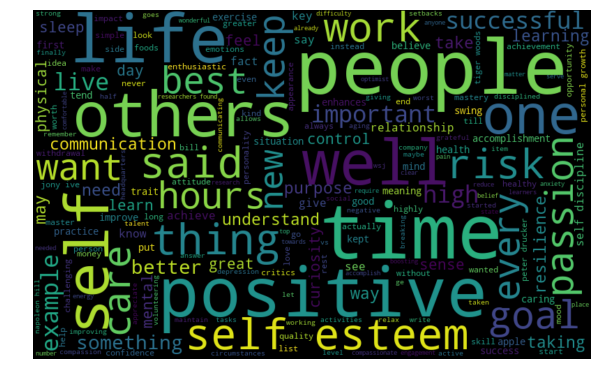

In [7]:
import wordcloud
from wordcloud import WordCloud
positive_words = ' '.join([text for text in gdArr])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

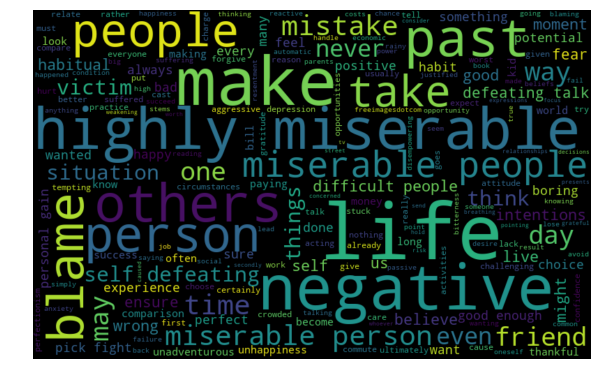

In [8]:
negative_words = ' '.join([text for text in adArr])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()